In [17]:
import scipy as sci
from scipy.special import factorial, assoc_laguerre, sph_harm
from scipy import constants
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import seaborn as sns
import matplotlib.animation as animation
from IPython import display

$$\Psi_{n,l,m}(r, \theta, \varphi) = \sqrt{\left(\frac{2}{n}\right)^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\frac{r}{n}} \left(\frac{2r}{n}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{n}\right) Y^m_l\left(\theta, \varphi \right)$$

In [2]:
def Psi(n, l, m, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    
    cz1 = np.sqrt((2.0/n)**3 * factorial(n-l-1)/(2.0*n*factorial(n+l)))
    cz1 = cz1 * np.exp(-r/n) * (2.0*r/n)**l * assoc_laguerre(2.0*r/n, n-l-1, 2*l+1)
    
    cz2 = cz1 *  sph_harm(m, l, phi, theta)
    
    return cz2

In [3]:
# Liczby kwantowe dla wodoru
n = 4
l = 2
m = 1

# Zakres rysowania
u_lim = 20
b_lim = -20

# Dokładność rysunków
step = 0.2

xs = np.arange(b_lim, u_lim, step)
ys = np.arange(b_lim, u_lim, step)
zs = np.arange(b_lim, u_lim, step)
x, y, z = np.meshgrid(xs, ys, zs)


prob = np.abs(Psi(n, l, m, x, y, z))**2

TypeError: 'Poly3DCollection' object is not callable

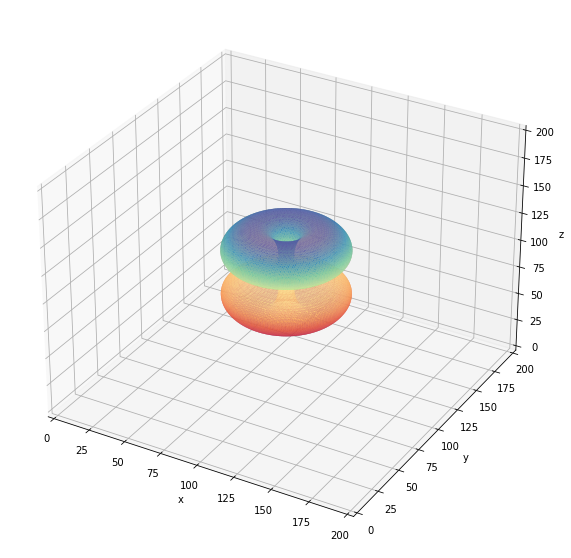

In [29]:
#%matplotlib tk
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

di = 0.1

verts, faces, normals, values = measure.marching_cubes(prob, 10**(-4.6))
plot = plot(ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral'))



def animate(i, plot = plot):
    plot[0].remove()
    verts, faces, normals, values = measure.marching_cubes(prob, 10**(-4.6 + i*di))
    plot[0] = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral')

    

anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())
    
    
ax.set_title(f'Liczby kwantowe wodoru n={n}, l={l}, m={m}') 
plt.show()



In [36]:
#%matplotlib tk
fig, ax = plt.subplots(figsize = (10,8))

 
def init():
  #  sns.heatmap(prob[:, 0, :], xticklabels=20, yticklabels=20) # Odkomentuj aby zobaczyć przekrój X lub Y w połowie
    sns.heatmap(prob[:, :, 0], xticklabels=20, yticklabels=20) # Odkomentuj aby zobaczyć przekrój Z w połowie

def animate(i):
    plt.clf()
   # sns.heatmap(prob[:, i, :], xticklabels=20, yticklabels=20) # Odkomentuj aby zobaczyć przekrój X lub Y w połowie
    sns.heatmap(prob[:, :, i], xticklabels=20, yticklabels=20) # Odkomentuj aby zobaczyć przekrój Z w połowie
    plt.title(f'Numer płaszczyzny: {i}', fontsize=30)
    return sns
    

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x), interval = 40, repeat = True)

# converting to an html5 video
video = anim.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

